# Sign Language MNIST

* **Reference**: https://www.kaggle.com/datamunge/sign-language-mnist

## Background

* Originally, the MNIST image dataset of handwritten digits is a popular benchmark for image-based machine learning methods but researchers have renewed efforts to update it and develop drop-in replacements that are more challenging for computer vision and original for real-world applications.
* Dataset has excluded J and Z which require motion).
* Each training and test case represents a label (0-25) as a one-to-one map for each alphabetic letter A-Z (and no cases for 9=J or 25=Z because of gesture motions). The training data (27,455 cases) and test data (7172 cases).
* Similar with a header row of label, pixel1,pixel2….pixel784 which represent a single 28x28 pixel image with grayscale values between 0-255. The original hand gesture image data represented multiple users repeating the gesture against different backgrounds. 
* The Sign Language MNIST data came from greatly extending the small number (1704) of the color images included as not cropped around the hand region of interest.

## Aim/Purpose:

* Data exploration of images
    - Summarise number of training/test cases.
* Neural Network building:
    - Data Augmentation:
        - Increase accuracy of **validation sets**
        - Rescaling/Normalize the images.
        - Rotation by angle.
        - Random shifting with range.
        - Shearing.
        - Random zooming.
        - Horizontal/Vertical Flipping.
    - Neural Network:
        - Add two **Convolution Layers** with ReLu activation function.
        - Add two Two **Pooling Layers** consecutively after convolutionalize the images.
        - Add a single **Flatten Layer** to convert matrix of pixels into array to further parsing.
        - Add a **Dropout** layer to probabilistically remove the inputs to a layer, which may be input variables in the data sample or activations from a previous layer.
        - Add **dense** layer to compile the weights and finally another one to determines the class of object.
])

* Loss function in Compiling:
    - Mainly we use Cross Entropy function as **log-loss function**.
    - For 2 class/binary classification:
        - Binary Crossentropy.
    - For multi class classification:
        - Categorical Crossentropy
        - Sparse Categorical Crossentropy
        
* Optimizer in Compiling:
    - **Simple Reference**: https://towardsdatascience.com/understanding-rmsprop-faster-neural-network-learning-62e116fcf29a
    -  **RMSProp**: 
        - RMS stands for root mean square.
        - Keep the moving average of the squared gradients for each weight. 
        - And then we divide the gradient by square root the mean square.


In [1]:
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from os import getcwd

In [2]:
def get_data(filename):
    images = []
    labels = []
    with open(filename) as training_file:
        images = []
        labels = []
        #skip first row.
        training_file.readline()
        for count,row in enumerate(training_file):
            row = row.split(",")
            label = np.array(row[0]).astype(np.float)
            image_string = np.array(row[1:785]).astype(np.float)
            
            image = np.array_split(image_string, 28)
            
            label = np.array(label) 
            image = np.array(image) 
            
            labels = np.append(labels, label)
            images.append(image)
                
                
        labels = np.array(labels).astype(float)
        images = np.array(images).astype(float)

    return images, labels


path_sign_mnist_train = f"{getcwd()}\\sign_mnist_train.csv"
path_sign_mnist_test = f"{getcwd()}\\sign_mnist_test.csv"
training_images, training_labels = get_data(path_sign_mnist_train)
testing_images, testing_labels = get_data(path_sign_mnist_test)

# Keep these
print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [3]:
# Adding another dimension to the data

training_images = np.expand_dims(training_images, axis=3)
testing_images = np.expand_dims(testing_images, axis=3)

# Create an ImageDataGenerator and do Image Augmentation
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

validation_datagen = ImageDataGenerator(rescale = 1./255. )
    
# Keep These
print(training_images.shape)
print(testing_images.shape)
    
# Their output should be:
# (27455, 28, 28, 1)
# (7172, 28, 28, 1)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [4]:
# Define the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'), 
    tf.keras.layers.Dense(25, activation='softmax')
])

# Compile Model. 
model.compile(loss = 'sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# Train the Model
history = model.fit_generator(train_datagen.flow(training_images, training_labels), 
                              validation_data = validation_datagen.flow(testing_images, testing_labels),
                              epochs=10, verbose = 1)

model.evaluate(testing_images, testing_labels, verbose=0)

Epoch 1/10
858/858 [==============================] - 65s 76ms/step - loss: 2.7473 - accuracy: 0.1657 - val_loss: 1.7925 - val_accuracy: 0.4218
Epoch 2/10
858/858 [==============================] - 65s 75ms/step - loss: 2.1006 - accuracy: 0.3386 - val_loss: 1.4381 - val_accuracy: 0.4757
Epoch 3/10
858/858 [==============================] - 63s 73ms/step - loss: 1.7317 - accuracy: 0.4494 - val_loss: 0.9528 - val_accuracy: 0.6807
Epoch 4/10
858/858 [==============================] - 63s 73ms/step - loss: 1.4856 - accuracy: 0.5166 - val_loss: 0.6494 - val_accuracy: 0.7818
Epoch 5/10
858/858 [==============================] - 63s 73ms/step - loss: 1.3193 - accuracy: 0.5696 - val_loss: 0.6878 - val_accuracy: 0.7656
Epoch 6/10
858/858 [==============================] - 63s 74ms/step - loss: 1.1930 - accuracy: 0.6124 - val_loss: 0.4678 - val_accuracy: 0.8526
Epoch 7/10
858/858 [==============================] - 63s 74ms/step - loss: 1.0985 - accuracy: 0.6428 - val_loss: 0.4441 - val_accuracy:

[130.5679134405065, 0.6742889]

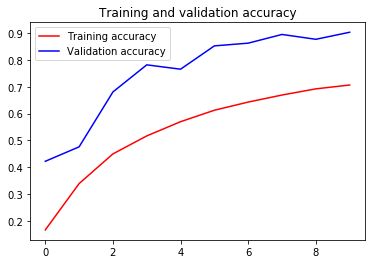

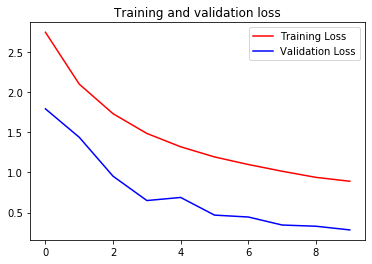

In [7]:
# Plot the chart for accuracy and loss on both training and validation
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [18]:
from keras.preprocessing import image
import cv2

img = cv2.imread(f"{getcwd()}\\" + "random_c.jpg")
img = cv2.resize(img, (28, 28))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = img.reshape((28, 28, 1))
img = tf.cast(img, tf.float32)
model.predict(np.expand_dims(img, axis = 0))

# Given C, model predicted a Y... :(

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)